In [1]:
from nilearn.decoding import SearchLight
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from configs.params import alignment_dict_fn_onlyaim2, alignment_dict_fn_onlyaim_wb
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import joblib

MAC IS  62438188057035


In [2]:
# https://nilearn.github.io/modules/generated/nilearn.decoding.SearchLight.html#nilearn.decoding.SearchLight
#
# https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_searchlight.html#sphx-glr-auto-examples-02-decoding-plot-haxby-searchlight-py
#
# https://nilearn.github.io/stable/decoding/searchlight.html
#
# https://brainiak.org/tutorials/07-searchlight/
#https://brainiak.org/notebooks/tutorials/html/07-searchlight.html
#
# http://www.pymvpa.org/examples/hyperalignment.html#searchlight-hyperalignment
#
# https://naturalistic-data.org/content/Functional_Alignment.html
#
# https://brainiak.org/examples/SRM.html
#
# https://cameronphchen.github.io/files/20170215_SRM_Tutorial.pdf
#
# https://github.com/cameronphchen/SRM_tutorial
#
# https://cameronphchen.github.io/files/20170620_FPO.pdf
# https://brainiak.org/tutorials/11-SRM/
#
# https://brainiak.org/events/sfn2017/260.08.pdf
# https://lukas-snoek.com/NI-edu/fMRI-pattern-analysis/week_2/decoding_analyses.html#searchlight-analysis

In [3]:
vodka_scrambled_subject_ids =["088", "115", "116", "117", "118", "119", "120", "121", "122",
                              "123", "124", "125", "126", "127", "128", "129", "130", "131"]
scrambled_fmri_data_path   = "/Users/orenkobo/Desktop/PhD/Aim2_new/Materials/vodka/deriviatives_new/deriviatives/fmriprep"

vodka_intact_subject_ids = ["023", "030", "032", "038", "052", "079", "086", "087", "088",
                            "089", "090", "097", "098", "102", "103", "107", "109", "110"]
intact_fmri_data_path   = "/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep/"
nii_desc = "space-MNI152NLin2009cAsym_res-native_desc-preproc_bold"

In [4]:

def create_func_fns(subject_ids, task, data_path):
    func_fns = []
    regressor_fns = []
    for subj_id in subject_ids:
        subj_func_dir = '{}/sub-{}/'.format(data_path,subj_id)
        subj_func_file = '{}/func/sub-{}_task-{}_{}.nii.gz'.format(subj_func_dir, subj_id, task,  nii_desc)
        regressor_file = f'{subj_func_dir}/func/sub-{subj_id}_task-{task}_desc-confounds_regressors.tsv'
        func_fns.append(subj_func_file)
        regressor_fns.append(regressor_file)
    print("\n".join(regressor_fns))
    print("------")
    print("\n".join(func_fns))
    print("------")
    print('Loading data from {0} subjects...'.format(len(func_fns)))
    return func_fns, regressor_fns

intact_func_fns, intact_regressor_fns = create_func_fns(vodka_intact_subject_ids, "milky", intact_fmri_data_path)
scrambled_func_fns, scrambled_regressor_fns = create_func_fns(vodka_scrambled_subject_ids, "vodkascram", scrambled_fmri_data_path)

/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-023//func/sub-023_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-030//func/sub-030_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-032//func/sub-032_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-038//func/sub-038_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-052//func/sub-052_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-079//func/sub-079_task-milky_desc-confounds_regressors.tsv
/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-086//func/sub-086_task-milky_desc-confounds_

In [5]:
intact_func_fns

['/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-023//func/sub-023_task-milky_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz',
 '/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-030//func/sub-030_task-milky_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz',
 '/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-032//func/sub-032_task-milky_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz',
 '/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-038//func/sub-038_task-milky_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz',
 '/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-052//func/sub-052_task-milky_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz',
 '/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep//sub-079//fu

In [6]:
# fmri_img = index_img(intact_func_fns[0], condition_mask)

In [7]:
alignment_dict = joblib.load(alignment_dict_fn_onlyaim2)
mask = alignment_dict['aim2_fmri_data_dict']['vodka']['fitted_brain_masks']['vodka-intact-reward']


In [ ]:
sl_cv = StratifiedKFold(n_splits=5, shuffle=True)
sl_estimator = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
sl = SearchLight(
    mask_img=mask_img,
    # process_mask_img=process_mask,
    radius=5,  # we'll use a 5 mm radius
    estimator=sl_estimator,
    n_jobs=1,  # use only 1 core (for your own analyses, you might want to increase this!)
    scoring='roc_auc',  # use AUROC as model performance metric
    cv=sl_cv,
    verbose=True  # print a progressbar while fitting
);

In [27]:
from nilearn import datasets
from nilearn.image import load_img, get_data, new_img_like
haxby_dataset = datasets.fetch_haxby()
mask_img = load_img(haxby_dataset.mask)
process_mask = get_data(mask_img).astype(int)
picked_slice = 29
process_mask[..., (picked_slice + 1):] = 0
process_mask[..., :picked_slice] = 0
process_mask[:, 30:] = 0
process_mask_img = new_img_like(mask_img, process_mask)

In [37]:
sl_cv = StratifiedKFold(n_splits=5, shuffle=True)
sl_estimator = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
from nilearn.datasets import load_mni152_brain_mask
mni152_mask = load_mni152_brain_mask()


sl = SearchLight(
    mask_img=mni152_mask, # mask_img
    # process_mask_img=process_mask,
    radius=5,  # we'll use a 5 mm radius
    estimator=sl_estimator,
    n_jobs=1,  # use only 1 core (for your own analyses, you might want to increase this!)
    scoring='roc_auc',  # use AUROC as model performance metric
    cv=sl_cv,
    verbose=True  # print a progressbar while fitting
);

In [47]:
from nilearn.image import index_img
import pandas as pd
from nilearn import datasets
from nilearn.image import new_img_like, load_img, get_data

# We fetch 2nd subject from haxby datasets (which is default)
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('Anatomical nifti image (3D) is located at: %s' % haxby_dataset.mask)
print('Functional nifti image (4D) is located at: %s' % haxby_dataset.func[0])

fmri_filename = haxby_dataset.func[0]
fmri_filename = "/Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep/sub-023/func/sub-023_task-milkyway_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz"
print("example fmri_filename is " , fmri_filename)
labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
labels = labels.iloc[:297]

y = labels['labels']
session = labels['chunks']
condition_mask = y.isin(['face', 'house'])

fmri_img = index_img(fmri_filename, condition_mask)
y, session = y[condition_mask], session[condition_mask]



Anatomical nifti image (3D) is located at: /Users/orenkobo/nilearn_data/haxby2001/mask.nii.gz
Functional nifti image (4D) is located at: /Users/orenkobo/nilearn_data/haxby2001/subj2/bold.nii.gz
example fmri_filename is  /Users/orenkobo/Desktop/PhD/Aim3/narratives/data/narratives/derivatives/fmriprep/sub-023/func/sub-023_task-milkyway_space-MNI152NLin2009cAsym_res-native_desc-preproc_bold.nii.gz


In [48]:
import datetime
print(datetime.datetime.now())
sl.fit(fmri_img, y)
print(datetime.datetime.now())

2022-07-05 14:11:30.414945


ValueError: These spheres are empty: [115635]

In [ ]:
from nilearn.input_data import NiftiMasker

import numpy as np
# For decoding, standardizing is often very important
print(datetime.datetime.now())
nifti_masker = NiftiMasker(mask_img=mask_img, runs=session,
                           standardize=True, memory='nilearn_cache',
                           memory_level=1)
fmri_masked = nifti_masker.fit_transform(fmri_img)
print(datetime.datetime.now())
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(fmri_masked, y)
p_values = -np.log10(p_values)
p_values[p_values > 10] = 10
p_unmasked = get_data(nifti_masker.inverse_transform(p_values))
print(datetime.datetime.now())
from nilearn import image
mean_fmri = image.mean_img(fmri_img)

from nilearn.plotting import plot_stat_map, plot_img, show
searchlight_img = new_img_like(mean_fmri, sl.scores_)

# Because scores are not a zero-center test statistics, we cannot use
# plot_stat_map
plot_img(searchlight_img, bg_img=mean_fmri,
         title="Searchlight", display_mode="z", cut_coords=[-9],
         vmin=.42, cmap='hot', threshold=.2, black_bg=True)

# F_score results
p_ma = np.ma.array(p_unmasked, mask=np.logical_not(process_mask))
f_score_img = new_img_like(mean_fmri, p_ma)
plot_stat_map(f_score_img, mean_fmri,
              title="F-scores", display_mode="z",
              cut_coords=[-9],
              colorbar=False)

show()

In [49]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from nltools.mask import create_sphere, expand_mask
from nltools.data import Brain_Data, Adjacency
from nltools.stats import align
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from nilearn.plotting import plot_stat_map
import datalad.api as dl
import warnings

warnings.simplefilter('ignore')
data_dir = '/Volumes/Engram/Data/Sherlock'

# If dataset hasn't been installed, clone from GIN repository
if not os.path.exists(data_dir):
    dl.clone(source='https://gin.g-node.org/ljchang/Sherlock', path=data_dir)

# Initialize dataset
ds = dl.Dataset(data_dir)

# Get Cropped & Denoised HDF5 Files
result = ds.get(glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', f'*crop*hdf5')))

[INFO] Cloning dataset to Dataset(/Volumes/Engram/Data/Sherlock) 
INFO:datalad.core.distributed.clone:Cloning dataset to Dataset(/Volumes/Engram/Data/Sherlock)
[INFO] Attempting to clone from https://gin.g-node.org/ljchang/Sherlock to /Volumes/Engram/Data/Sherlock 
INFO:datalad.core.distributed.clone:Attempting to clone from https://gin.g-node.org/ljchang/Sherlock to /Volumes/Engram/Data/Sherlock
[INFO] Attempting to clone from https://gin.g-node.org/ljchang/Sherlock/.git to /Volumes/Engram/Data/Sherlock 
INFO:datalad.core.distributed.clone:Attempting to clone from https://gin.g-node.org/ljchang/Sherlock/.git to /Volumes/Engram/Data/Sherlock
[INFO] Completed clone attempts for Dataset(/Volumes/Engram/Data/Sherlock) 
INFO:datalad.core.distributed.clone:Completed clone attempts for Dataset(/Volumes/Engram/Data/Sherlock)


IncompleteResultsError: Command did not complete successfully. 1 failed:
[{'action': 'install',
  'message': ('Failed to clone from any candidate source URL. Encountered '
              'errors per each url were:\n'
              '- %s',
              'https://gin.g-node.org/ljchang/Sherlock\n'
              "  CommandError: 'git -c diff.ignoreSubmodules=none clone "
              '--progress https://gin.g-node.org/ljchang/Sherlock '
              "/Volumes/Engram/Data/Sherlock' failed with exitcode 128 [err: "
              "'fatal: could not create leading directories of "
              "'/Volumes/Engram/Data/Sherlock': Permission denied']\n"
              '- https://gin.g-node.org/ljchang/Sherlock/.git\n'
              "  CommandError: 'git -c diff.ignoreSubmodules=none clone "
              '--progress https://gin.g-node.org/ljchang/Sherlock/.git '
              "/Volumes/Engram/Data/Sherlock' failed with exitcode 128 [err: "
              "'fatal: could not create leading directories of "
              "'/Volumes/Engram/Data/Sherlock': Permission denied']"),
  'path': '/Volumes/Engram/Data/Sherlock',
  'source_url': 'https://gin.g-node.org/ljchang/Sherlock',
  'status': 'error',
  'type': 'dataset'}]

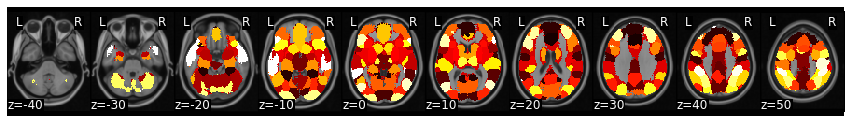

In [50]:
mask = Brain_Data('https://neurovault.org/media/images/8423/k50_2mm.nii.gz')
mask_x = expand_mask(mask)
mask.plot()

In [51]:
scan = 'Part2'
roi = 4

roi_mask = mask_x[roi]

file_list = glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', f'*crop*{scan}*hdf5'))
all_data = []
for f in file_list:
    sub = os.path.basename(f).split('_')[0]
    print(sub)
    data = Brain_Data(f)
    all_data.append(data.apply_mask(roi_mask))

In [57]:
data_dir

'/Volumes/Engram/Data/Sherlock'

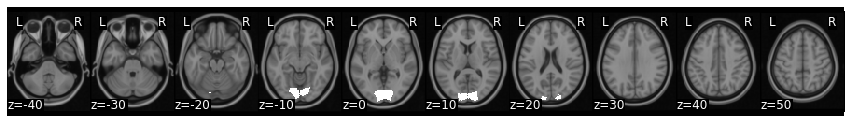

In [52]:
roi_mask.plot()

In [54]:
hyperalign = align(all_data[:5], method='procrustes')

IndexError: list index out of range

In [59]:
haxby_dataset.session_target

['/Users/orenkobo/nilearn_data/haxby2001/subj2/labels.txt']

In [58]:
haxby_dataset = datasets.fetch_haxby()

fmri_filename = haxby_dataset.func[0]
df = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
y = df['labels']
session = df['chunks']
df

,labels,chunks
0,rest,0
1,rest,0
2,rest,0
3,rest,0
4,rest,0
...,...,...
1447,rest,11
1448,rest,11
1449,rest,11
1450,rest,11
